In [11]:
import pandas as pd
import numpy as np
from scipy.stats import skew

In [3]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [24]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns
print("Numerical Features : ", numerical_features)
print("Categorical Features : ", categorical_features)

Numerical Features :  Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')
Categorical Features :  Index(['Sex'], dtype='object')


In [6]:
# creating One-hot encoding for sex
abalone = pd.get_dummies(df)
abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

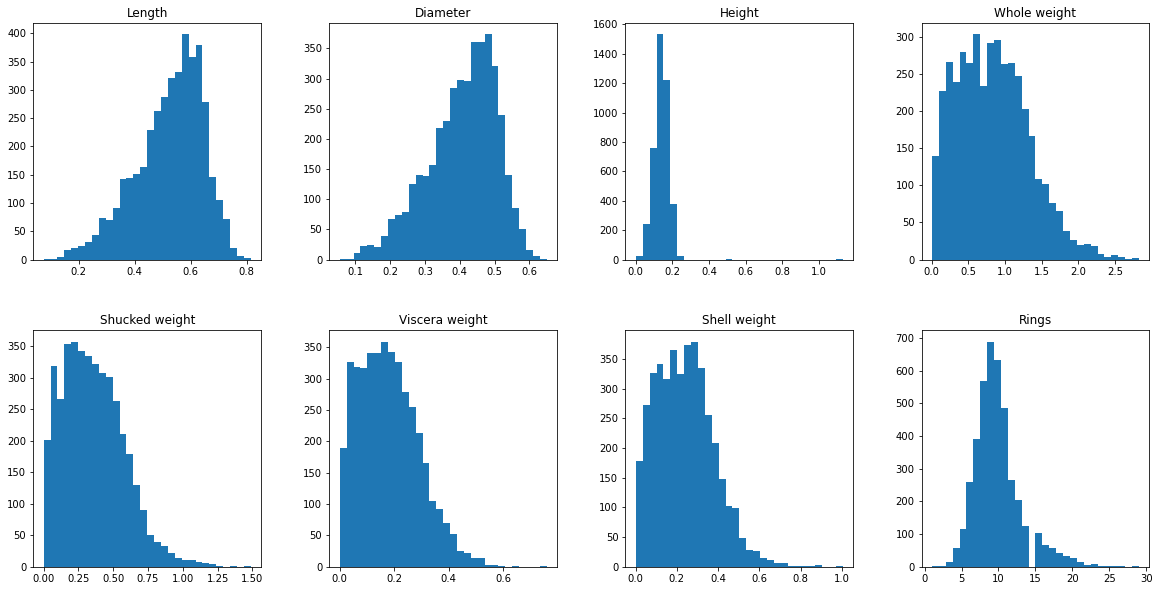

In [8]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [13]:
skew_values = skew(df[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


In [22]:
# separating the data into dependenet and independent sets
y = abalone["Rings"]
X = abalone.drop(columns="Rings")

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# applying KNN
from sklearn.neighbors import KNeighborsClassifier

# Initializing classifier and giving hyperparameter k=3
knn = KNeighborsClassifier(n_neighbors=3)
# training classifier
knn.fit(X_train, y_train)
# Evaluate the classifier
print(knn.score(X_test, y_test))
# Try changing hyperparameter
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.2117224880382775
0.21770334928229665


In [29]:
# applying Logistic Regression

from sklearn.linear_model import LogisticRegression

# Initializing classifier with one-v-rest approach. random_state is # to ensure same results in every execution.
logr = LogisticRegression(multi_class = 'ovr', random_state=3)
# training classifier
logr.fit(X_train, y_train)
# Evaluate the classifier
print(logr.score(X_test, y_test))

0.22966507177033493


In [31]:
# applying Decision Trees

from sklearn.tree import DecisionTreeClassifier
# Initializing classifier. random_state is to ensure same results in every execution. max_depth is to specify number of splits
dt = DecisionTreeClassifier(random_state=0, max_depth = 3)
# training classifier
dt.fit(X_train, y_train)
# Evaluate the classifier
print(dt.score(X_test, y_test))

0.23205741626794257
